<img src="./fiuba.jpg" align="right" width="150" /> 
### Procesamiento Digital de Señales

Trabajo Práctico 1
#### Santiago Germino

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin(2\pi.k.\frac{ f_0}{f_s} + \phi_0),\space\space \forall k \in \Bbb{R} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [1]:
def generador_senoidal (fs, f0, N, a0=1, p0=0):
    """     
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    

    # comienzo de la función

    # ts:     tiempo de muestreo
    # tt:     vector de tiempo
    # signal: señal f0,a0,p0 muestreada en frecuencia fs mediante base de tiempo tt
    
    ts     = 1 / fs
    tt     = np.linspace(0, (N-1) * ts, N).flatten()
    signal = a0 * np.sin (2 * np.pi * f0 * tt + p0)
    
    # fin de la función
    
    return tt, signal

a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


<img src="./fig_ejemplo.svg" align="center" width="100%" /> 
<img src="./fig_ejemplo2.svg" align="center" width="70%" /> 

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Insertar aquí el código para inicializar tu notebook
########################################################

def generador_senoidal (fs, f0, N, a0, p0):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    ff:     base de frecuencia de la señal
    """    

    # comienzo de la función
    
    # ts:     tiempo de muestreo
    # df:     resolucion espectral
    # tt:     vector de tiempo
    # ff:     vector de frecuencias
    # signal: señal f0,a0,p0 muestreada en frecuencia fs mediante base de tiempo tt
    
    ts     = 1  / fs
    df     = fs / N
    tt     = np.linspace(0, (N-1) * ts, N).flatten ()
    ff     = np.linspace(0, (N-1) * df, N).flatten ()

    signal = a0 * np.sin (2 * np.pi * f0 * tt + p0)

    # fin de la función
    
    return tt, ff, signal

In [3]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz

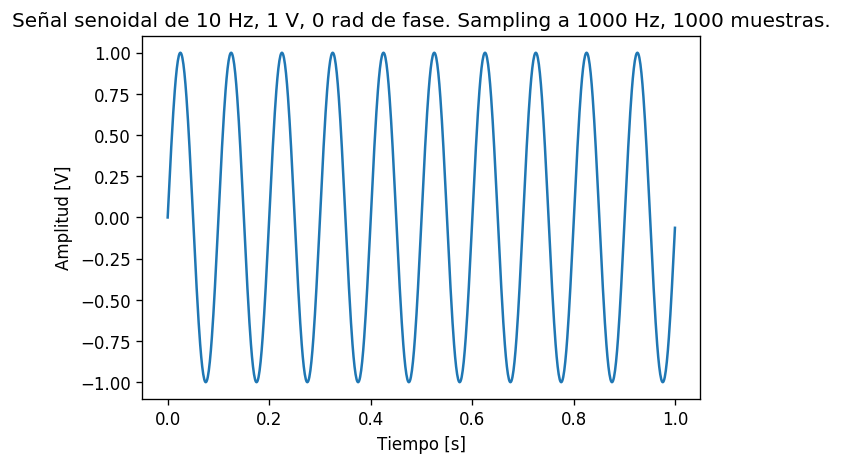

In [4]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

[tt, ff, signal] = generador_senoidal (fs, f0, N, a0, p0)

plt.figure (dpi=120)
plt.title  ('Señal senoidal de ' + str(f0) + ' Hz, ' + str(a0) + ' V, ' + str(p0) + ' rad de fase. ' +
            'Sampling a ' + str(fs) + ' Hz, ' + str(N) + ' muestras.')
# presentar una leyenda para cada tipo de señal
plt.xlabel ('Tiempo [s]')
plt.ylabel ('Amplitud [V]')
plt.plot   (tt, signal)
plt.show   ()

¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si. Se infieren 10 Hz debido a los 10 periodos por segundo en la grafica.
</div>

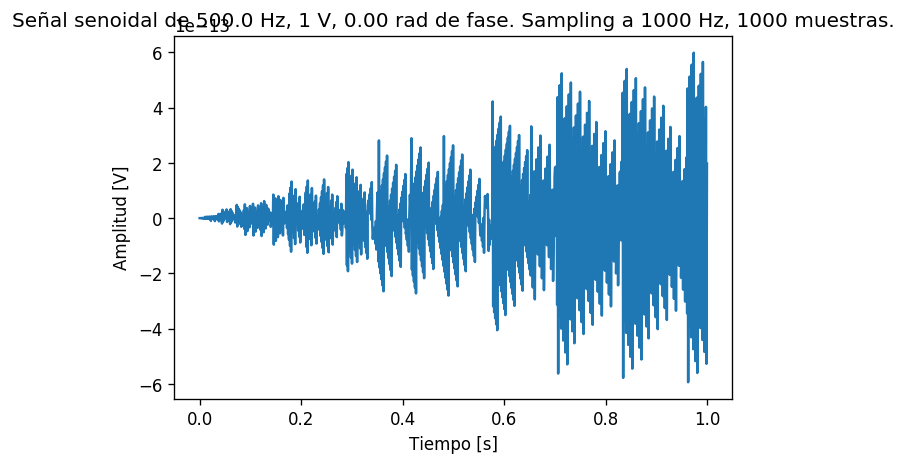

In [5]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

[tt, ff, signal] = generador_senoidal (fs, f0, N, a0, p0)

plt.figure (dpi=120)
plt.title  ('Señal senoidal de ' + str(f0) + ' Hz, ' + str(a0) + ' V, ' + format(p0, '.2f') + ' rad de fase. ' +
            'Sampling a ' + str(fs) + ' Hz, ' + str(N) + ' muestras.')
# presentar una leyenda para cada tipo de señal
plt.xlabel ('Tiempo [s]')
plt.ylabel ('Amplitud [V]')
plt.plot   (tt, signal)
plt.show   ()

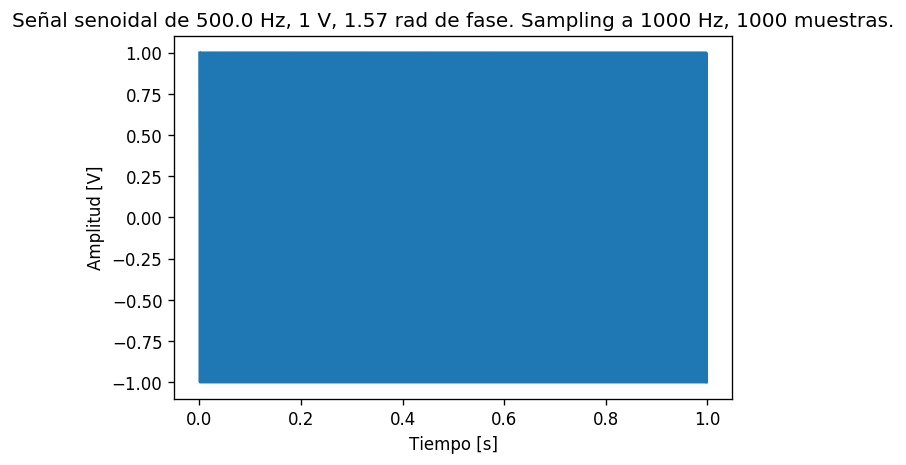

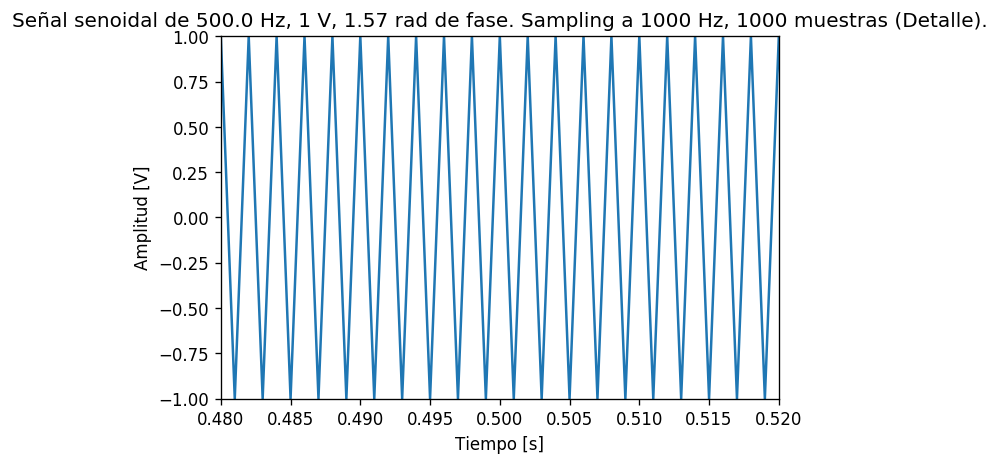

In [6]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

[tt, ff, signal] = generador_senoidal (fs, f0, N, a0, p0)

plt.figure (dpi=120)
plt.title  ('Señal senoidal de ' + str(f0) + ' Hz, ' + str(a0) + ' V, ' + format(p0, '.2f') + ' rad de fase. ' +
            'Sampling a ' + str(fs) + ' Hz, ' + str(N) + ' muestras.')
# presentar una leyenda para cada tipo de señal
plt.xlabel ('Tiempo [s]')
plt.ylabel ('Amplitud [V]')
plt.plot   (tt, signal)
plt.show   ()

plt.figure (dpi=120)
plt.title  ('Señal senoidal de ' + str(f0) + ' Hz, ' + str(a0) + ' V, ' + format(p0, '.2f') + ' rad de fase. ' +
            'Sampling a ' + str(fs) + ' Hz, ' + str(N) + ' muestras (Detalle).')
# presentar una leyenda para cada tipo de señal
plt.xlabel ('Tiempo [s]')
plt.ylabel ('Amplitud [V]')
plt.axis   ([0.48, 0.52, -1, 1])
plt.plot   (tt, signal)
plt.show   ()

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No es posible.
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La señal posee la mitad de la frecuencia de sampling con lo cual cumpliria con Nyquist y como se ve en el detalle, evita el aliasing. Aun asi, la frecuencia de sampling no es suficiente para conocer los parametros de la senoidal. En cuanto a los anomalias de los graficos, en a.2 el sampleo siempre cae sobre los ceros de la señal pero se observaria un error incremental de representacion numerica. En a.3, se samplea sobre los maximos y minimos de la señal [1, -1] y el barrido en lineas verticales de 1 a -1 seria otro error de representacion.
</div>

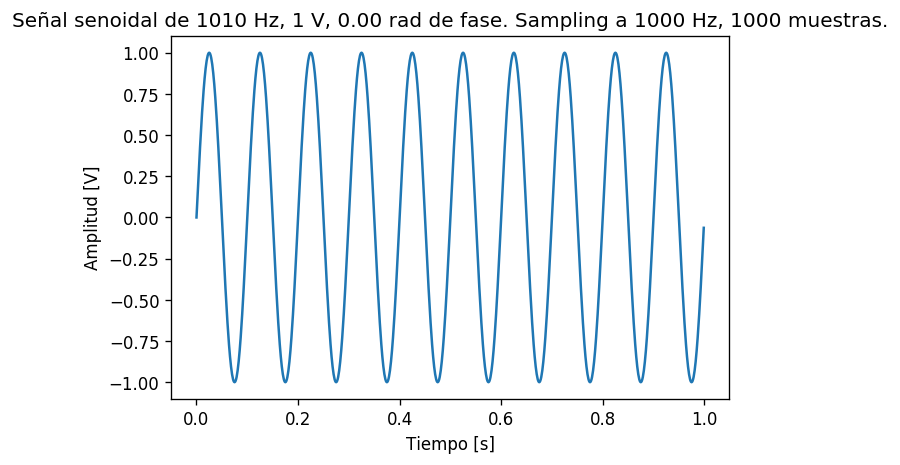

In [7]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

[tt, ff, signal] = generador_senoidal (fs, f0, N, a0, p0)

plt.figure (dpi=120)
plt.title  ('Señal senoidal de ' + str(f0) + ' Hz, ' + str(a0) + ' V, ' + format(p0, '.2f') + ' rad de fase. ' +
            'Sampling a ' + str(fs) + ' Hz, ' + str(N) + ' muestras.')
# presentar una leyenda para cada tipo de señal
plt.xlabel ('Tiempo [s]')
plt.ylabel ('Amplitud [V]')
plt.plot   (tt, signal)
plt.show   ()

¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No es posible ya que no puede diferenciarse 1010 Hz de 10 Hz cuando la frecuencia de muestreo es de solo 1000 Hz.
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Aumentar la frecuencia de muestreo o bien como se hizo, indicar claramente la frecuencia de entrada y salida para interpretar correctamente el grafico.
</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

In [8]:
import timeit

the_start = timeit.timeit()
print("hello")
the_end = timeit.timeit()
print(the_start - the_end)


hello
-0.00033466494642198086


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [9]:
from pandas import DataFrame
from IPython.display import HTML

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['--'], 
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   ['']  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['tiempo transcurrido (s)'],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df.to_html())


,tiempo transcurrido (s)
Tamaño de la señal N,--
16,
32,
64,
128,
256,
512,
1024,
2048,


<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

[[  1.06563723e-15   5.51703315e-16   1.20027489e-15 ...,   4.37063813e-16
    1.20027489e-15   5.51703315e-16]
 [  6.07680413e-05   6.07692244e-05   6.07727740e-05 ...,   6.07786906e-05
    6.07727740e-05   6.07692244e-05]
 [  3.59101455e-05   3.64231745e-05   3.79208418e-05 ...,   4.02940739e-05
    3.79208418e-05   3.64231745e-05]
 [  2.01779422e-03   2.01783076e-03   2.01794037e-03 ...,   2.01812308e-03
    2.01794037e-03   2.01783076e-03]]


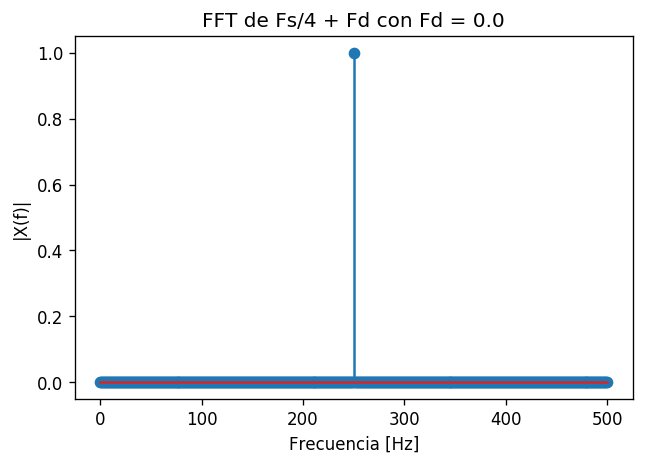

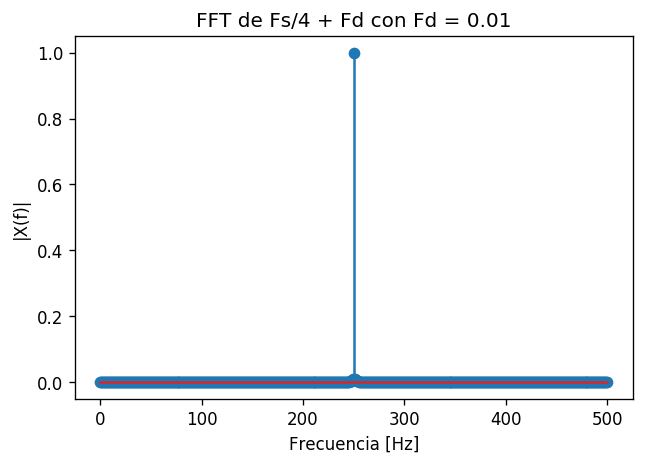

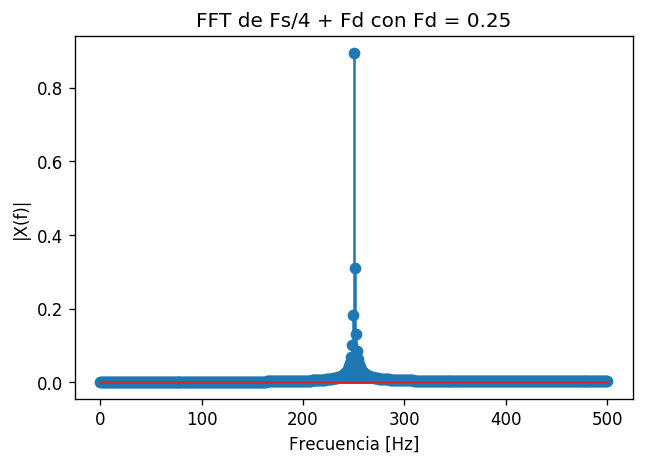

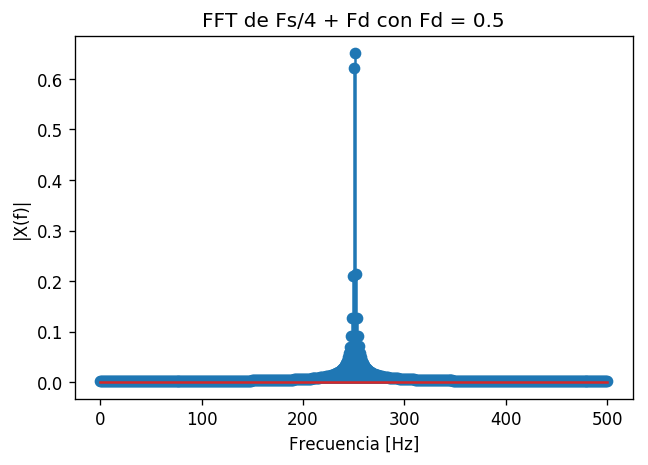

,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,1.00000,0.00000,0.00000
$f_S/4+0.01$,0.99983,0.01035,0.13030
$f_S/4+0.25$,0.89493,0.30888,2.86988
$f_S/4+0.5$,0.62133,0.65174,4.30959


In [10]:
#######################################
# Tu simulación que genere resultados #
#######################################
import scipy.fftpack

# N       :  numero de muestras
# Fs      :  frecuencia de muestreo
# Fd      :  frecuencias de desintonia respecto a Fs/4
# F0      :  Frecuencias de desintonia
# t       :  Eje de tiempo, 0 a N a incrementos de (N-1) / Fs
# y       :  Señales senoidales con F0 en tiempo t, una para cada desintonia.
# f       :  Eje de frecuencias
# FFTabsN :  Modulo de FFT en Nyquist
# FFTabsH :  Modulo de FFT en Nyquist / 2
# FHic    :  Indice a la frecuencia central en FFTabsH
# SumNf0  :  Sumatoria de todos los valores menos |X(f0)|

N  = 1024
Fs = 1000
Fd = np.array ([[0.00], [0.01], [0.25], [0.5]])
F0 = Fs / 4 + Fd
t  = np.linspace (0.0, (N - 1) / Fs, N)
f  = np.linspace (0.0, Fs / 2, N // 2)
y  = np.sin (F0 * 2.0 * np.pi * t)

FFTabsN = (2 / N) * np.abs (scipy.fftpack.fft (y))

print (FFTabsN)

FFTabsH = FFTabsN[:, :N // 2]
FHic    = N // 2 // 2
SumNf0  = [0, 0, 0, 0]


for i in range(len (Fd)):
#    plt.figure (dpi=120)
#    plt.title  ('Señal de Fs/4 + Fd con Fd = ' + str(Fd[i][0]))
#    plt.xlabel ('Tiempo [s]')
#    plt.ylabel ('Amplitud')
#    plt.plot   (t, y[i])
#    plt.show   ()
    plt.figure (dpi=120)
    plt.title  ('FFT de Fs/4 + Fd con Fd = ' + str(Fd[i][0]))
    plt.xlabel ('Frecuencia [Hz]')
    plt.ylabel ('|X(f)|')
    plt.stem   (f, FFTabsH[i])
    plt.show   ()
    for j in range (N // 2): 
        if j != FHic:
            SumNf0[i] += FFTabsH[i][j]


resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
               [''                       ,                           '',                        '$F:f \neq f_0$'], 
               [format(FFTabsH[0][FHic], '.5f'), format(FFTabsH[0][FHic + 1], '.5f'), format(SumNf0[0], '.5f')],
               [format(FFTabsH[1][FHic], '.5f'), format(FFTabsH[1][FHic + 1], '.5f'), format(SumNf0[1], '.5f')],
               [format(FFTabsH[2][FHic], '.5f'), format(FFTabsH[2][FHic + 1], '.5f'), format(SumNf0[2], '.5f')], 
               [format(FFTabsH[3][FHic], '.5f'), format(FFTabsH[3][FHic + 1], '.5f'), format(SumNf0[3], '.5f')]  
             ]

df = DataFrame(resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())

<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

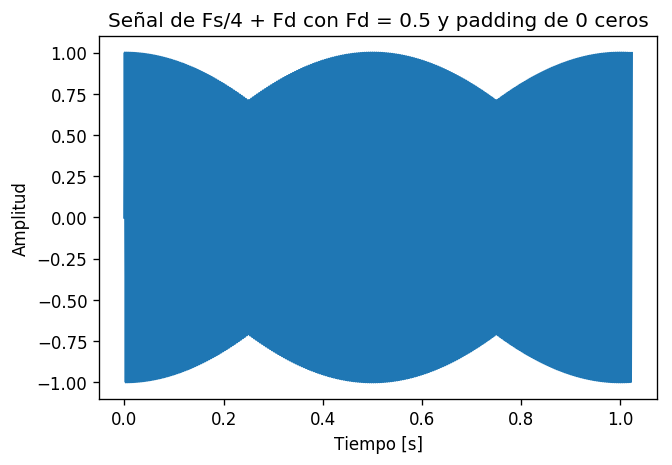

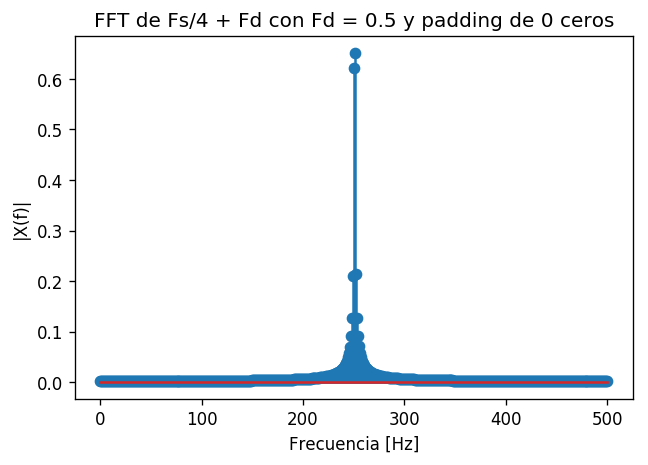

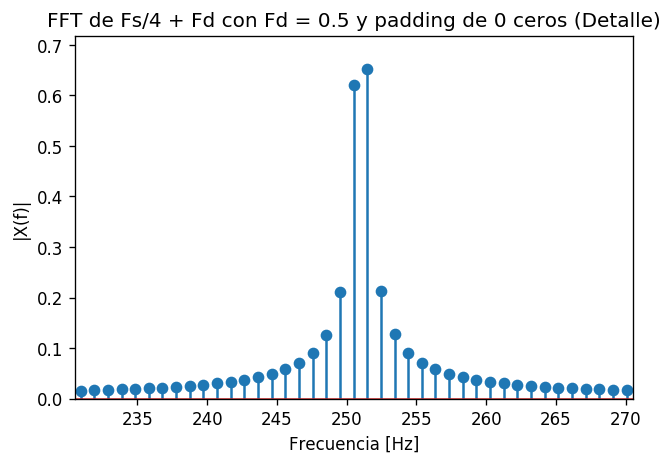

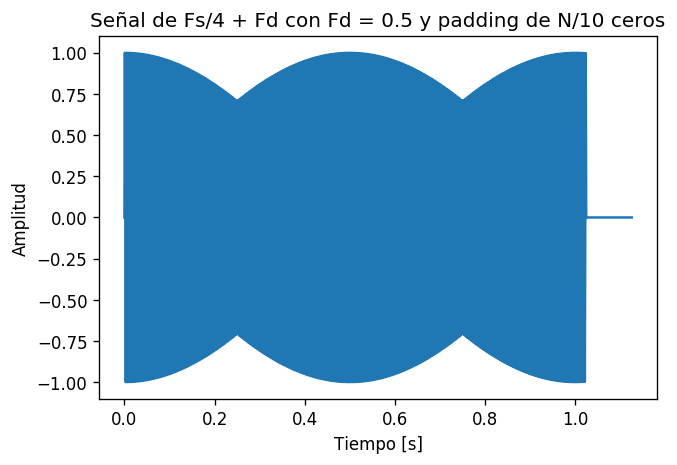

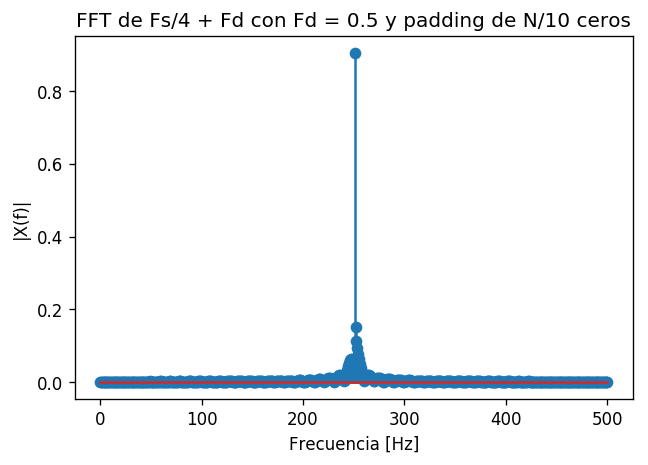

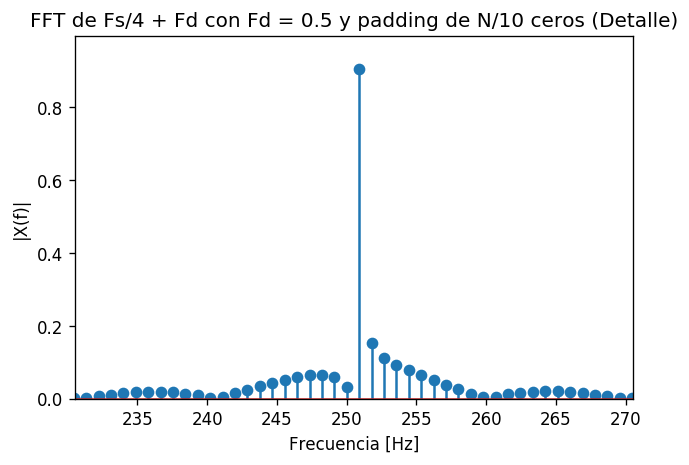

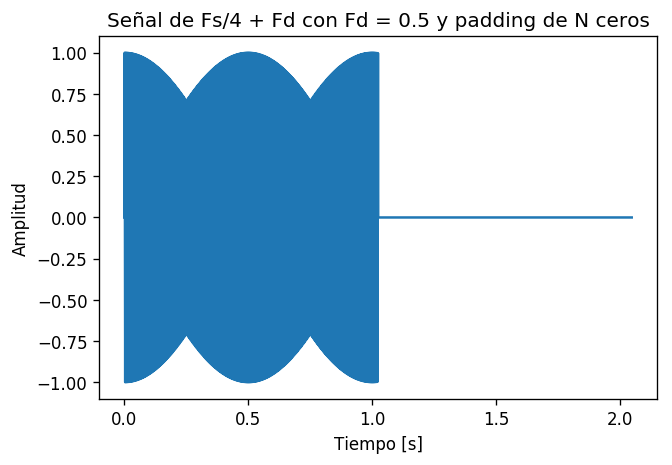

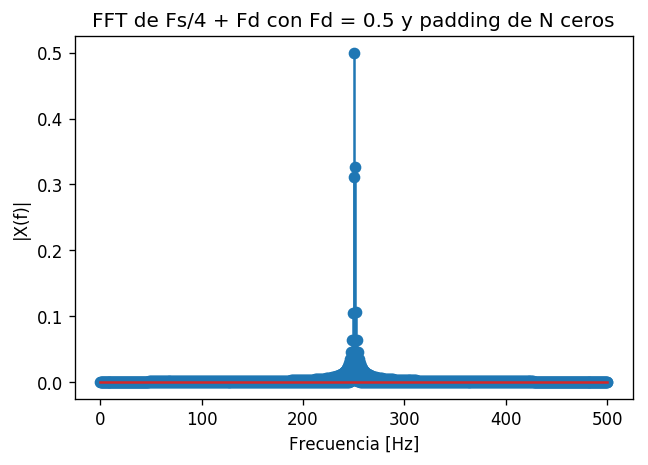

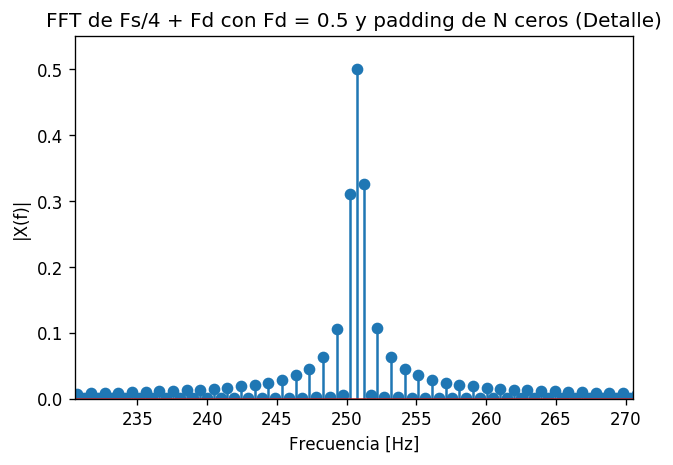

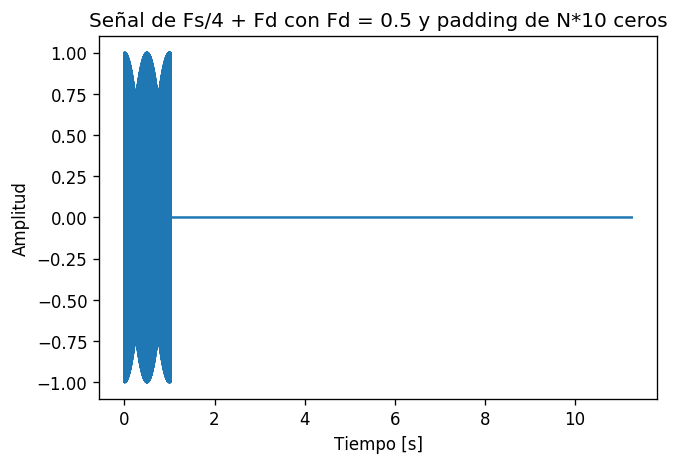

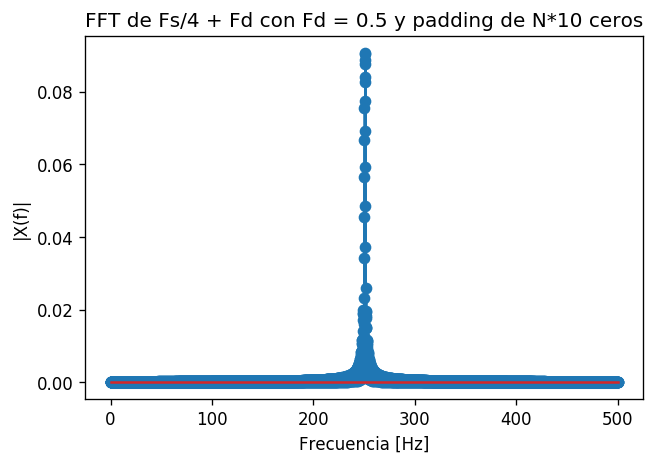

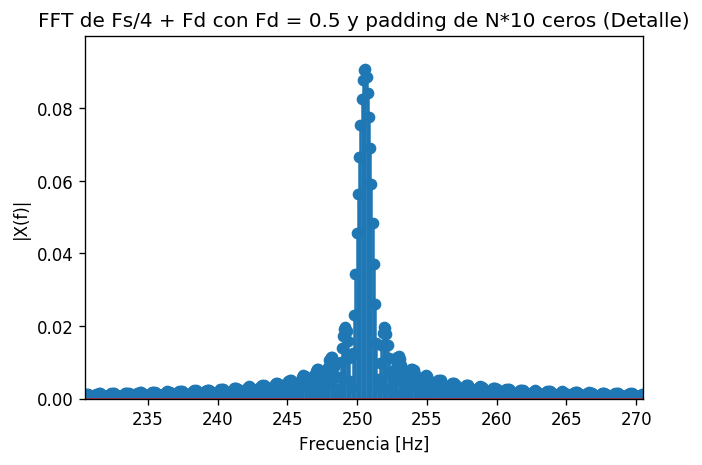

In [11]:
# No se agrega ningun cero, N/10, N y N*10 ceros a final.
Fz      = np.array ([0, N//10, N, N*10])
FzText  = ['0', 'N/10', 'N', 'N*10']
F0Frm   = [ 0, 0, 0, 0 ]
F0Dif   = [ 0, 0, 0, 0 ]

for i in range(len (Fz)):
    # y3z   : Fs / 4 + 0.5 con padding de ceros correspondiente a esta iteracion
    # M     : Cantidad de muestras (N + ceros) para esta iteracion
    y3z       = np.pad (y[3], (0,Fz[i]), 'constant')
    M         = N + Fz[i]

    # FFT
    FFTabsN   = (2 / M) * np.abs (scipy.fftpack.fft(y3z))
    FFTabsH   = FFTabsN[:M // 2]

    # Nuevos eje de tiempo para M muestras y frecuencias para M muestras / 2
    t = np.linspace (0.0, (M - 1) / Fs, M)
    f = np.linspace (0.0, Fs / 2, M // 2)

    # Amax  : Amplitud maxima (en frecuencia)
    # f0Frm : Frecuencia donde se da la amplitud maxima
    # F0Dif : En cuanto difiere F0 = FS / 4 + 0.5 de la frecuencia "fundamental" estimada, en %
    Amax      = np.amax (FFTabsH);
    F0Frm[i]  = f[ np.where(FFTabsH == Amax)[0][0] ]
    F0Dif[i]  = np.abs (F0[3][0] - F0Frm[i]) / F0[3][0] * 100

    plt.figure (dpi=120)
    plt.plot   (t, y3z)
    plt.title  ('Señal de Fs/4 + Fd con Fd = ' + str(Fd[3][0]) + ' y padding de ' + FzText[i] + ' ceros')
    plt.xlabel ('Tiempo [s]')
    plt.ylabel ('Amplitud')
    plt.show   ()

    plt.figure (dpi=120)
    plt.stem   (f, FFTabsH)
    plt.title  ('FFT de Fs/4 + Fd con Fd = ' + str(Fd[3][0]) + ' y padding de ' + FzText[i] + ' ceros')
    plt.xlabel ('Frecuencia [Hz]')
    plt.ylabel ('|X(f)|')
    plt.show   ()

    plt.figure (dpi=120)
    plt.stem   (f, FFTabsH)
    plt.title  ('FFT de Fs/4 + Fd con Fd = ' + str(Fd[3][0]) + ' y padding de ' + FzText[i] + ' ceros (Detalle)')
    plt.xlabel ('Frecuencia [Hz]')
    plt.ylabel ('|X(f)|')
    plt.axis   ([230.5, 270.5, 0, Amax + Amax * 0.1])
    plt.show   ()

**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si. En 3.a la resolucion espectral es de Fs/N. En este ejercicio es de Fs/(N+M), siendo M = (N/10, N, 10*N) lo cual siempre da un valor mayor de muestras a ubicar en el mismo eje de frecuencias.
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Agregar muestras en cero no suma componentes de frecuencia y produce que los bins se "compriman" o definan hacia la frecuencia central, permitiendo estimarla con mayor precisión. El desplazamiento causado por el zero padding produce la aparicion de una señal cuadrada cuyo valor en 1 representa la ventana de muestreo de la señal original en el tiempo total de adquisicion de las M muestras. Ambos fenomenos pueden apreciarse en las figuras del punto 3.b.
</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [12]:
tus_resultados = [ [format(F0Frm[0], '.2f') + ' Hz', format(F0Dif[0], '.2f')], # <-- acá debería haber numeritos :)
                   [format(F0Frm[1], '.2f') + ' Hz', format(F0Dif[1], '.2f')], # <-- acá debería haber numeritos :)
                   [format(F0Frm[2], '.2f') + ' Hz', format(F0Dif[2], '.2f')], # <-- acá debería haber numeritos :)
                   [format(F0Frm[3], '.2f') + ' Hz', format(F0Dif[3], '.2f')]  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\hat{f}_0$', '$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())

,$\hat{f}_0$,$e_\%$
0,251.47 Hz,0.39
$N/10$,250.89 Hz,0.16
$N$,250.73 Hz,0.09
$10N$,250.58 Hz,0.03


<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.a) Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [13]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.b) **1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [14]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


Observe el resultado y compare sus resultados con el punto anterior. ¿Qué ha cambiado? ¿Cuánto vale la energía de un solo ciclo de senoidal respecto al caso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.c) 1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [15]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


En este caso, ¿Qué ha cambiado respecto al anterior? ¿Cómo se manifiesta en el dominio frecuencial?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.d) 1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [16]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Puede localizar ambas componentes en este espectro? ¿Cómo lo haría?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.e) Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [17]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿ha cambiado el espectro respecto al caso anterior? ¿Si solo dispone del espectro, puede decir cuál ha ocurrido antes? ¿Resulta útil el análisis de espectral mediante la transformada de Fourier en este caso?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.f) Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [18]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con la señal donde los 9 ciclos estaban presentes? ¿Y respecto a la que solo había 1 ciclo?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.g) Idem anterior, pero cada ciclo con amplitudes (1, 5, 3).</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [19]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.h) Idem patrón anterior, pero repetido 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [20]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior? ¿Y respecto al que estaban los 9 ciclos presentes pero con la misma amplitud?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.i) En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [21]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el que estaba un solo ciclo presente?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

In [22]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
                   ['',                                             '',                                             ''                              ], 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

In [23]:
#####################################
# Tu simulación que genere gráficas #
#####################################


¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [24]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [25]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,,,
8 bits,,,
16 bits,,,


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>